In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data = 'C:/Users/ADMIN/Desktop/SEM-7/Dl-practicals/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img'


In [6]:
img_gen = ImageDataGenerator(rescale=1.0/255)

In [7]:
data_gen = img_gen.flow_from_directory(
    data,
    target_size=(32,32),
    batch_size=9144,
    shuffle=True,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [8]:
x_data, y_data = data_gen[0]

In [12]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7315, 32, 32, 3)
(1829, 32, 32, 3)
(7315, 102)
(1829, 102)


In [12]:
from tensorflow.keras.applications import VGG16

In [14]:
path = 'C:/Users/ADMIN/Desktop/SEM-7/Dl-practicals/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg_model = VGG16(weights=path, include_top=False, input_shape=(32,32,3))

In [15]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [16]:
from tensorflow.keras import models, layers

In [17]:
custom_classifier = models.Sequential()
custom_classifier.add(layers.Flatten(input_shape=(1,1,512)))
custom_classifier.add(layers.Dense(64, activation='relu'))
custom_classifier.add(layers.Dropout(0.2))
custom_classifier.add(layers.Dense(32, activation='relu'))
custom_classifier.add(layers.Dropout(0.2))
custom_classifier.add(layers.Dense(102, activation='softmax'))
                      

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model = models.Sequential([
    vgg_model,
    custom_classifier
])

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

74/74 ━━━━━━━━━━━━━━━━━━━━ 351s 5s/step - accuracy: 0.0509 - loss: 4.6106 - val_accuracy: 0.0929 - val_loss: 4.2648


In [ ]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.0909 - loss: 4.3264 

In [ ]:
loss, accurcay = model.evaluate(x_test,y_test)

In [ ]:
pred = model.predict(x_test)

In [ ]:
labels = list(data_gen.class_indices.keys())

Actual:  airplanes
Predicted:  BACKGROUND_Google


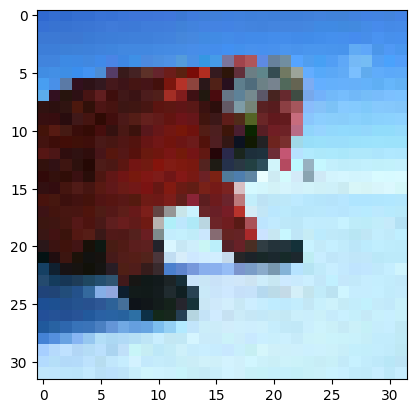

In [43]:
plt.imshow(x_test[10])
print('Actual: ', labels[np.argmax(pred[10])])
print('Predicted: ', labels[np.argmax(y_test[10])])